### Mean-Variance Potfolio Optimization with Elastic Net Penalty

Utilizes Pylops: python library of linear operators for inverse problems

In [33]:
import pylops 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
equity_data=pd.read_csv('equity_data_2021.csv')
equity_data.index=equity_data['Date']
equity_data=equity_data.drop(columns=['Date'])

returns=np.log(equity_data/equity_data.shift(1)).dropna()
returns

,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2021-05-17,0.003565,-0.012619,-0.013359,0.003943,-0.002274,-0.004173,-0.011312,-0.000296,-0.007882,-0.000360,...,0.004333,0.000021,-0.015434,-0.012911,-0.007290,-0.005212,-0.009745,-0.008767,0.001162,-0.011794
2021-05-18,-0.010193,-0.028627,0.002054,0.002734,0.018561,-0.014000,0.014627,-0.009059,-0.004401,-0.010488,...,-0.008798,-0.026687,0.011241,0.000141,-0.020630,0.005380,-0.009296,0.004393,-0.034090,-0.000940
2021-05-19,-0.002120,-0.003637,-0.005142,-0.011671,0.003693,-0.007234,0.006386,-0.008991,-0.000312,-0.008869,...,-0.006888,0.003161,0.001268,-0.003395,-0.017169,-0.004874,0.014903,-0.004695,-0.014351,0.006854
2021-05-20,-0.004700,0.004507,0.012128,0.010817,0.008758,0.010550,0.024211,-0.004375,0.023043,0.017144,...,0.009124,-0.003227,0.002609,0.014211,0.005551,0.010308,0.018721,0.007034,-0.006640,0.026047
2021-05-21,0.001041,0.004920,-0.005704,-0.008490,0.012977,-0.002009,-0.012504,0.012620,-0.007349,0.005855,...,-0.005502,0.003710,0.005748,0.006406,0.014480,-0.001919,0.000911,0.002334,0.018413,0.001251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.009839,0.023050,0.016393,0.009869,0.015830,0.029368,0.004441,0.009581,0.014051,0.017572,...,0.010935,0.025787,-0.014734,0.003148,0.006701,0.019536,0.040250,0.006436,0.010369,0.016360
2021-12-28,0.005306,0.009869,-0.007023,-0.000149,-0.001090,-0.000144,0.018469,0.012933,-0.014507,-0.000894,...,-0.001423,0.009103,-0.012871,0.011901,0.010344,-0.000217,-0.014971,0.003125,0.001586,-0.009210
2021-12-29,0.004325,0.003151,0.005113,0.007192,0.012235,0.000361,0.007323,0.001195,-0.000123,0.007853,...,-0.001216,0.008640,-0.017266,0.005015,-0.001340,0.004916,0.006342,0.000156,0.005373,0.011317


### Computation of Naive mean and covariance estimation from sample

In [52]:
returns_mean=returns.mean()
returns_cov=pd.DataFrame(np.cov(returns.T))

Text(0.5, 1.0, 'Distribution of Average Log Return ')

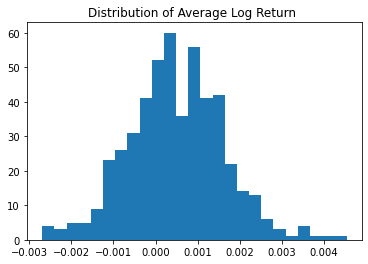

In [53]:
bins=plt.hist(returns.mean(),bins=25)
plt.title("Distribution of Average Log Return ")

### Application of Split-Bregman

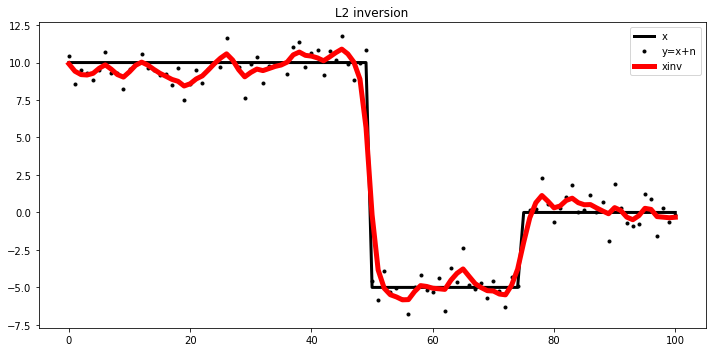

In [4]:
D2op = pylops.SecondDerivative(nx, edge=True)
lamda = 1e2

xinv = pylops.optimization.leastsquares.regularized_inversion(
    Iop, y, [D2op], **dict(iter_lim=30)
)[0]

plt.figure(figsize=(10, 5))
plt.plot(x, "k", lw=3, label="x")
plt.plot(y, ".k", label="y=x+n")
plt.plot(xinv, "r", lw=5, label="xinv")
plt.legend()
plt.title("L2 inversion")
plt.tight_layout()

### Application of Sparse Solver Split Bregman Operator

Ref: https://pylops.readthedocs.io/en/latest/api/generated/pylops.optimization.sparsity.splitbregman.html

SplitBregman
-----------------------------------------------------------------
The Operator Op has 101 rows and 101 cols
niter_outer =  50     niter_inner =   3   tol = 1.00e-04
mu = 1.00e+00         epsL1 = [3]	  epsL2 = [1]
-----------------------------------------------------------------
    Itn       x[0]           r2norm           r12norm
     1     9.6056e+00       7.868e+01        1.487e+02
     2     9.5162e+00       8.644e+01        1.508e+02
     3     9.4819e+00       8.386e+01        1.567e+02
     4     9.4684e+00       8.471e+01        1.613e+02
     5     9.4628e+00       8.413e+01        1.632e+02
     6     9.4600e+00       8.289e+01        1.637e+02
     7     9.4581e+00       8.207e+01        1.635e+02
     8     9.4565e+00       8.139e+01        1.632e+02
     9     9.4547e+00       8.068e+01        1.626e+02
    10     9.4528e+00       8.009e+01        1.620e+02
    11     9.4508e+00       7.962e+01        1.616e+02
    21     9.4333e+00       7.767e+01        1.59

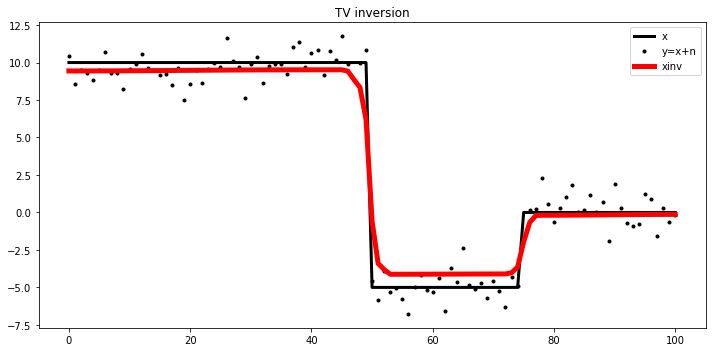

In [31]:
# identity operator on data 
Iop = pylops.Identity(nx)

# define first derivative operator
Dop = pylops.FirstDerivative(nx, edge=True, kind="backward")

# dampening param on mse; wlog take 1
mu = 1

# epsr1
lambda1 = 3

# eps2
lambda2=1

# iterations for opt
niter_out = 50
niter_in = 3

xinv = pylops.optimization.sparsity.splitbregman(
    Op=Iop,
    y=y,
    RegsL1=[Dop],
    RegsL2=[Dop],
    niter_outer=niter_out,
    niter_inner=niter_in,
    mu=mu,
    epsRL1s=[lambda1],
    epsRL2s=[lambda2],
    tol=1e-4,
    tau=1.0,
    show=True,
    **dict(iter_lim=30, damp=1e-10)
)[0]

plt.figure(figsize=(10, 5))
plt.plot(x, "k", lw=3, label="x")
plt.plot(y, ".k", label="y=x+n")
plt.plot(xinv, "r", lw=5, label="xinv")
plt.legend()
plt.title("TV inversion")
plt.tight_layout()

In [32]:
xinv

array([ 9.43951021,  9.43972488,  9.44015422,  9.44079814,  9.44165635,
        9.44272819,  9.44401241,  9.44550686,  9.44720827,  9.44911192,
        9.45121135,  9.45349812,  9.45596155,  9.45858859,  9.46136366,
        9.46426867,  9.46728305,  9.47038393,  9.47354635,  9.47674364,
        9.47994783,  9.48313016,  9.4862617 ,  9.48931392,  9.49225938,
        9.49507238,  9.49772964,  9.50021084,  9.50249921,  9.50458196,
        9.50645059,  9.50810112,  9.50953413,  9.51075467,  9.51177204,
        9.51259934,  9.513253  ,  9.51375202,  9.51411742,  9.51437124,
        9.51453573,  9.51463243,  9.51468055,  9.51469887,  9.51470175,
        9.51470011,  9.42580517,  8.86881593,  8.34338279,  6.20161914,
       -0.58328201, -3.40721686, -3.81004358, -4.12342505, -4.12307135,
       -4.12250097, -4.12173105, -4.12076556, -4.11964027, -4.11837216,
       -4.11698798, -4.1155176 , -4.11399218, -4.11244592, -4.11091104,
       -4.10942274, -4.10801342, -4.1067149 , -4.1055564 , -4.10